[0.54735762 0.57932425 0.61063923]
All tests passed!
yhat =  1  label=  0
yhat =  1  label=  1


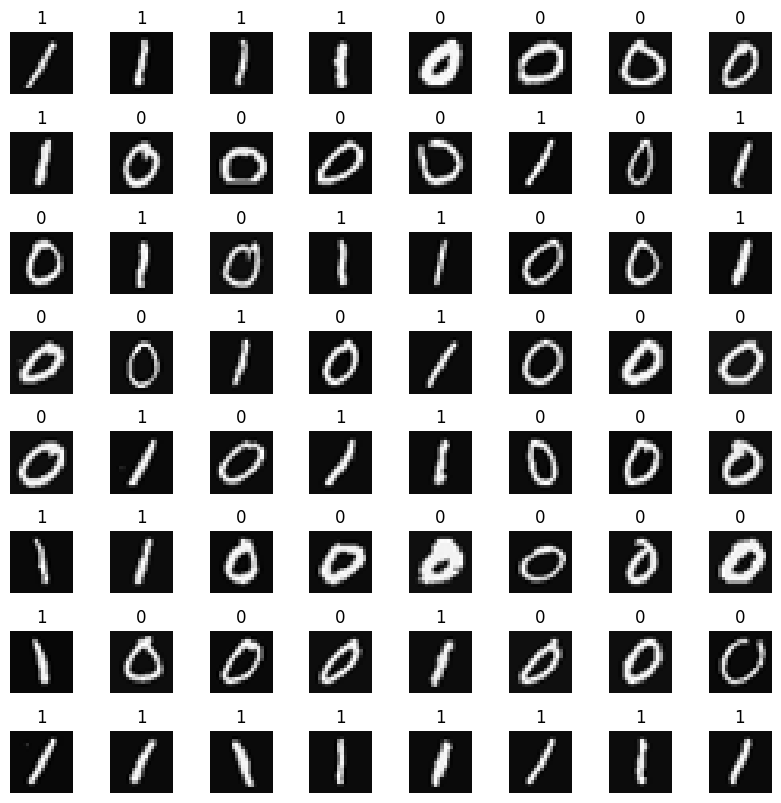

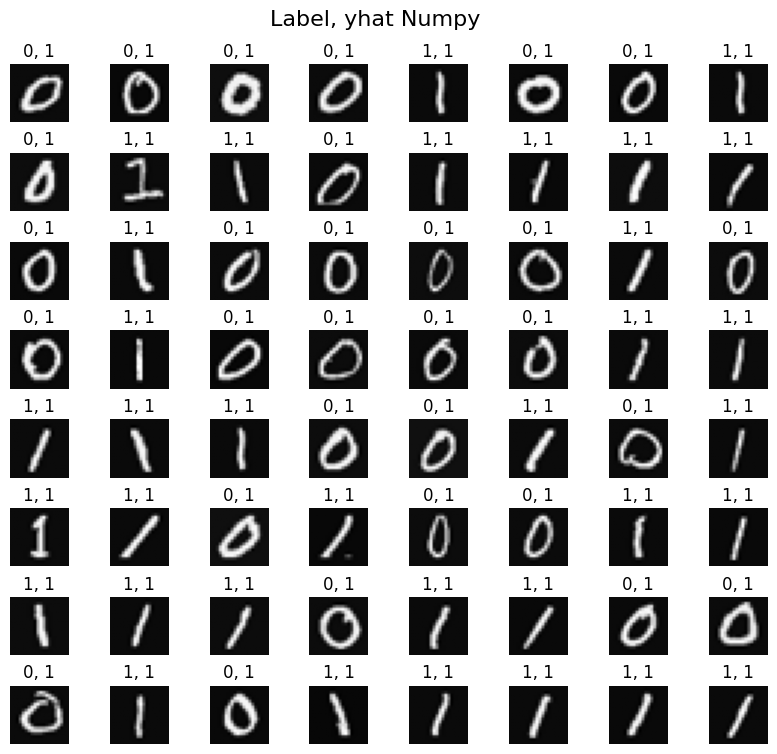

'\nPara ter previsões boas, você precisaria:\nTreinar a rede com backpropagation implementada em NumPy\nOu carregar pesos pré-treinados de um arquivo\nOu usar o TensorFlow para treinar primeiro e depois salvar os pesos em arquivos NumPy\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from autils import *  

# load the dataset
X,y = load_data()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

    def my_dense(a_in, W, b, g):
        """
        Computes dense layer
        Args:
            a_in (ndarray (n,)): Data, 1 example
            W (ndarray(n,j)): weigth matrix, n features per unit, j units
            b (ndarray(j,)): bias vector, j units
            g activation function(e.g. sigmoid, relu..)
        returns:
        a_out (ndarray (j,)) : j units
        """
        units = W.shape[1]
        a_out = np.zeros(units)
        for i in range(units):
            w = W[:,i]
            z = np.dot(w,a_in) + b[i]
            a_out[i] = g(z)
        return a_out
    # Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)
# UNIT TESTS
from public_tests import *
test_c2(my_dense)
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

# intialize numbers randomly, and with small values
np.random.seed(1) # para reprodutibilidade

W1_tmp = np.random.randn(400,25) * 0.01 # camada 1: 400 -> 25
b1_tmp = np.zeros(25) # bias para camada 1

W2_tmp = np.random.randn(25, 15)* 0.01 # camada 2: 25 -> 15
b2_tmp = np.zeros(15) # bias para camada 2

W3_tmp = np.random.randn(15,1) * 0.01 # camada 3: 15 -> 1
b3_tmp = np.zeros(1) # bias para camada 3

# make predictions (como os pesos são aleatórios, então as previsões não vão ser boas)
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])

prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_prediction_value = my_prediction[0] if len(my_prediction.shape) > 0 else my_prediction
    my_yhat = int(my_prediction_value >= 0.5)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {my_yhat}")
    ax.set_axis_off() 
    
fig.suptitle("Label, yhat Numpy", fontsize=16)  # Atualizei o título também
plt.show()

"""
Para ter previsões boas, você precisaria:
Treinar a rede com backpropagation implementada em NumPy
Ou carregar pesos pré-treinados de um arquivo
Ou usar o TensorFlow para treinar primeiro e depois salvar os pesos em arquivos NumPy
"""

def my_dense_v(a_in, W, b, g):
    a_out = g(np.matmul(a_in,W)+b)
    return a_out

X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)